- Jose Pablo Ponce 19092
- Gabriel Quiroz

In [2]:
#Importar las librerías

import pandas as pd
import numpy as np
import re
from collections import Counter
from sklearn import feature_extraction, tree, model_selection, metrics
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline
from yellowbrick.features import Rank2D
from yellowbrick.features import RadViz

## Parte 1 – Ingeniería de características


## Exploración de datos


Revise la data y realice las operaciones necesarias para unificar los datasets y que el dataset final contenga el mensaje del correo y la etiqueta que indique si es SPAM o no.

In [3]:
df1 = pd.read_csv('./completeSpamAssassin.csv/completeSpamAssassin.csv')  
df2 = pd.read_csv('./enronSpamSubset.csv/enronSpamSubset.csv')  

In [4]:
pd.options.display.max_colwidth = 200

In [176]:
print(df1.sample(n=5).head())


      Unnamed: 0  \
2831        2831   
22            22   
3005        3005   
1520        1520   
552          552   

                                                                                                                                                                                                         Body  \
2831  Hardware acceleration for SSL makes sense since PKI can slow down a\ntransaction by as much as 1,000-fold. Per this article, XML formatting only\nincreases doc size by about 20-fold.. I'm not sure...   
22                                                                                                                                                                                                      empty   
3005  Hi,Just the kind of announce I make once in a while :\n- I've rebuilt a new "alsaplayer" package based on Angle's one.\n- I've rebuilt a hopefully final version "-fr8" of the "alsa-driver" and\n  ...   
1520  Long time no chat!How have you been? 

In [177]:
print(df2.sample(n=5).head())

      Unnamed: 0.1  Unnamed: 0  \
5069         29751       29751   
6490         33244       33244   
1241         12670       12670   
6581         18836       18836   
1710         10603       10603   

                                                                                                                                                                                                         Body  \
5069  Subject: start date : 1 / 5 / 02 ; hourahead hour : 17 ;\n start date : 1 / 5 / 02 ; hourahead hour : 17 ; no ancillary schedules awarded . no variances detected .\n log messages :\n parsing file ...   
6490  Subject: re : tw unsubscribed capacity\n i added an extra " printable page " button on the page so that the entire page can be printed out .\n michelle , please let me know if you still have probl...   
1241  Subject: site update mon , 27 jun 2005 .\n subject : site update mon , 27 jun 2005 .\n thank you for using our online store and for your previous order . we have 

In [5]:
df1 = df1.drop(columns=['Unnamed: 0'])
df2 = df2.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])
print(df1.columns)
print(df2.columns)

Index(['Body', 'Label'], dtype='object')
Index(['Body', 'Label'], dtype='object')


In [6]:
df_final = pd.concat([df1, df2])
df_final = df_final.rename(columns={"Label": "Spam"})
df_final.sample(n=5).head() 


,Body,Spam
7738,"Subject: re : netco employee\r\n i ' m not sure . i ' ll speak to him on monday and let you know . jr\r\n jr\r\n - - - - - original message - - - - -\r\n from : kitchen , louise\r\n to : rub , jen...",0
5206,"Luis Villa wrote:\r\n > So you /are/ beberg posting under another name.\r\n > Finally proof of what we've known all along. ;)That'll come to a shock to Geege, I'm sure...- Joehttp://xent.com/mailm...",0
866,"On January 1st 2002, the European countries began\r\nusing the new Euro. Never before have so\r\nmany countries with such powerful economies united\r\nto use a single currency. Get your piece of...",1
4956,"Subject: final offer\r\n wed , 29 sep 2004 19 : 16 : 00 + 0200\r\n client identification # : 813 - 02\r\n dear client :\r\n after viewing your credit - rating and current situation , we have decid...",1
3387,"Subject: returned mail : see transcript for details\r\n the original message was received at tue , 19 jul 2005 11 : 00 : 57 gmt\r\n from mail 8 . atl . registeredsite . com [ 64 . 224 . 219 . 82 ]...",1


## Preprocesamiento

Aplique las técnicas de pre – procesamiento de lenguaje natural que considere necesarias 
(conversión de minúsculas, mayúsculas, eliminación de acentos, expansión de contracciones, eliminación de stop
words, etc.)

In [7]:
#removemos espacios al inicio y final
df_final['Body'] = df_final['Body'].str.strip()

In [8]:
#conversion a minusculas
df_final['Body'] = df_final['Body'].str.lower()


In [9]:
#remover acentos
df_final['Body'] = df_final['Body'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')


In [10]:
#expandir contracciones
import contractions
df_final["Body"] = df_final["Body"].apply(lambda x: contractions.fix(str(x)))

In [11]:
#eliminar caracteres especiales, numeros y simbolos
import re
def removerCaracteresEspecialesNumerosSimbolos(texto, removerDigitos =False):
    patron = r'[^a-zA-Z0-9\s]' if not removerDigitos else r'[^a-zA-Z\s]'
    texto = re.sub(patron,'', texto)
    return texto
oracion = 'Hoy es el partido de fútbol a las 7:45 @$%&'

df_final["Body"] = df_final["Body"].apply(lambda x: removerCaracteresEspecialesNumerosSimbolos(x, True))


In [12]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [13]:
#eliminar stop words
stop_words = nltk.corpus.stopwords.words('english')
df_final["Body"]= df_final["Body"].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stop_words))


In [196]:
df_final.sample(n=5).head() 


,Body,Spam
2829,stateful would seem worth effort although guess might help ddos attackssounds snakeoilish biased lots experience firewalls proxy servers limitations thereofken original message rohit khare mailtok...,0
2027,subject story stetson pleasant destroy weller melanie lame northern bulwark evocation chromatin n l n e n v e r p l e g r e e obtain diploma degree master send certificate countries worldwide cons...,1
582,subject free glucose meter enroll today see qualify free glucose meter ship diabetic testing supplies direct door free home delivery bill insurance medicare visit http www diabetesecare com veloznet,1
3608,also identified spam everything inbox mime structure html parts several messages saved zope geeks list happened using mime andor html know strangest implied claim hates mime independent html examp...,0
4516,actually though case sensitive seems trouble wtih papchap authentication well might scripton friday july liam bedford wrote fri jul hamiltondavid hpirelandex claiming think hi trying find oceanfre...,0


## Representación de texto


Utilice los modelos de BoG (para n = 1,2) y TF-IDF. Muestre algunos ejemplos de los mensajes en su
representación numérica.

### Modelo Bag of Words

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(min_df=0.2, max_df=0.8)
# Min_df y Max_df nos sirven para controlar el porcentaje mínimo y máximo de apariciones de un token
cv_matrix = cv.fit_transform(df_final["Body"])
cv_matrix = cv_matrix.toarray()
cv_matrix

array([[3, 1, 1, ..., 0, 0, 0],
       [0, 1, 2, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 2, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [3, 0, 0, ..., 1, 0, 1]], dtype=int64)

In [15]:
# Palabras únicas del corpus
vocabulario = cv.get_feature_names_out()
# Mostrar el vector
df_cv_BagOfWords = pd.DataFrame(cv_matrix, columns=vocabulario)

### Modelo Bag of N-Grams

In [16]:
bv = CountVectorizer(ngram_range=(1,2), min_df=0.1, max_df=0.9)
bv_matrix = bv.fit_transform(df_final["Body"])

bv_matrix = bv_matrix.toarray()
vocabulario = bv.get_feature_names_out()
df_cv_BagOfNGrams = pd.DataFrame(bv_matrix, columns=vocabulario)

### Modelo TF -IDF

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer(min_df=0.1, max_df=0.9, use_idf=True)
tv_matrix = tv.fit_transform(df_final["Body"])
tv_matrix = tv_matrix.toarray()

vocabulario = tv.get_feature_names_out()
df_cv_TFIDF = pd.DataFrame(np.round(tv_matrix, 2), columns=vocabulario)

## Parte 2 – Implementación del modelo 
## Separación de datos 
- Datos de entrenamiento: 70% 
- Datos de prueba: 30% 


## Implementación 
Utilice el algoritmo multinomial de NaiveBayes para entrenar el modelo con cada uno de los modelos 
de representación numérico. Muestre los valores obtenidos para las siguientes métricas: 

- Matriz de confusión 
- Precision 
- Recall 
- F1 Score 

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB

## Bag Of Words

In [41]:
X_train, X_test, y_train, y_test = train_test_split(df_cv_BagOfWords, df_final["Spam"], train_size=0.7,test_size=0.3,random_state=0)

In [42]:
classifier = MultinomialNB()
classifier.fit(X_train,y_train)
print('Score: ',classifier.score(X_test,y_test))

Score:  0.6121728292480266


In [43]:
cross_val_score(classifier,X_test,y_test)

array([0.6251298 , 0.63759086, 0.62097612, 0.60124611, 0.62785863])

In [44]:
y_predicted = classifier.predict(X_test)

In [45]:
confusion_matrix_result = confusion_matrix(y_test,y_predicted)
confusion_matrix_result

array([[2358,  391],
       [1476,  589]], dtype=int64)

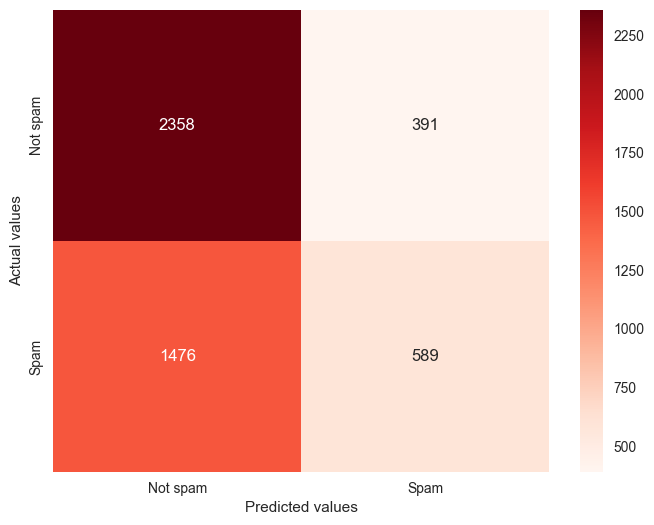

In [46]:
labels = ['Not spam','Spam']
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix_result,annot=True,cmap='Reds',fmt='.0f',xticklabels=labels,yticklabels=labels)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.show()

In [47]:
classification_report_result = classification_report(y_test,y_predicted)
print(classification_report_result)

              precision    recall  f1-score   support

           0       0.62      0.86      0.72      2749
           1       0.60      0.29      0.39      2065

    accuracy                           0.61      4814
   macro avg       0.61      0.57      0.55      4814
weighted avg       0.61      0.61      0.58      4814



## Bag Of N-grams

In [48]:
X_train, X_test, y_train, y_test = train_test_split(df_cv_BagOfNGrams, df_final["Spam"], train_size=0.7,test_size=0.3,random_state=0)

In [49]:
classifier = MultinomialNB()
classifier.fit(X_train,y_train)
print('Score: ',classifier.score(X_test,y_test))

Score:  0.7704611549646864


In [50]:
cross_val_score(classifier,X_test,y_test)

array([0.79646937, 0.76012461, 0.79023884, 0.7694704 , 0.78170478])

In [51]:
y_predicted = classifier.predict(X_test)

In [52]:
confusion_matrix_result = confusion_matrix(y_test,y_predicted)
confusion_matrix_result

array([[2129,  620],
       [ 485, 1580]], dtype=int64)

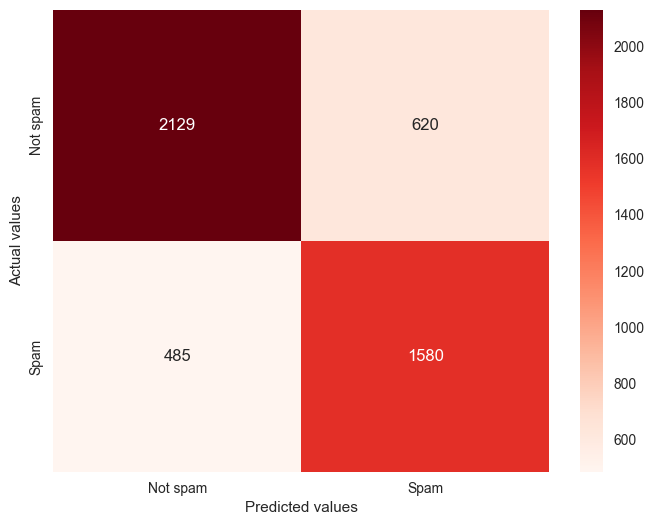

In [53]:
labels = ['Not spam','Spam']
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix_result,annot=True,cmap='Reds',fmt='.0f',xticklabels=labels,yticklabels=labels)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.show()

In [54]:
classification_report_result = classification_report(y_test,y_predicted)
print(classification_report_result)

              precision    recall  f1-score   support

           0       0.81      0.77      0.79      2749
           1       0.72      0.77      0.74      2065

    accuracy                           0.77      4814
   macro avg       0.77      0.77      0.77      4814
weighted avg       0.77      0.77      0.77      4814



## TF - IDF

In [55]:
X_train, X_test, y_train, y_test = train_test_split(df_cv_TFIDF, df_final["Spam"], train_size=0.7,test_size=0.3,random_state=0)

In [56]:
classifier = MultinomialNB()
classifier.fit(X_train,y_train)
print('Score: ',classifier.score(X_test,y_test))

Score:  0.8329871208973826


In [57]:
cross_val_score(classifier,X_test,y_test)

array([0.83385254, 0.83489097, 0.83489097, 0.80996885, 0.83056133])

In [58]:
y_predicted = classifier.predict(X_test)

In [59]:
confusion_matrix_result = confusion_matrix(y_test,y_predicted)
confusion_matrix_result

array([[2420,  329],
       [ 475, 1590]], dtype=int64)

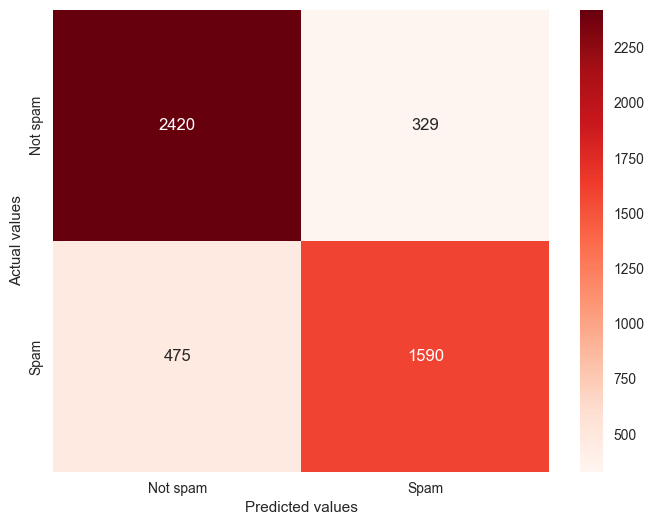

In [60]:
labels = ['Not spam','Spam']
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix_result,annot=True,cmap='Reds',fmt='.0f',xticklabels=labels,yticklabels=labels)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.show()

In [61]:
classification_report_result = classification_report(y_test,y_predicted)
print(classification_report_result)

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      2749
           1       0.83      0.77      0.80      2065

    accuracy                           0.83      4814
   macro avg       0.83      0.83      0.83      4814
weighted avg       0.83      0.83      0.83      4814



## Conclusion

Compare los valores para cada modelo de representación numérico. ¿Qué modelo produjo el mejor 
resultado, BoG o TF-IDF? ¿A que se debe la mejora? Explique los valores obtenidos en las métricas 
para el mejor modelo. 

Comparando todas las metricas y haciendo especial enfasis en la metrica f1-score, el modelo TF-IDF es el que mejor resultado obtuvo. Esta mejora se debe a que el modelo TF-IDF es un método que nos da una ponderación numérica de las palabras que refleja la importancia de una palabra en particular para un documento en un corpus, es decir, en una colección de documentos permitiendo que las palabras mas y menos comunes tomen mas peso. En este modelo la informacion del contexto no se tiene mientras que los otros modelos retienen el contexto.

Podemos observar las 3 principales metricas, precision, recall y f1-score

- precision: Es el porcentaje de predicciones positivas correctas respecto al total de predicciones positivas. En este caso fue de 0.83 siendo este un resultado preciso, pero que puede mejorarse, y nos indica que el modelo en un 83% de casos detecto correctamente spam.

- recall: Es el porcentaje de predicciones positivas correctas en relación con el total de positivos reales. Nos indica que de todas las palabras, el modelo predijo correctamente el resultado en un 83% de los casos.

- f1-score: Es unana media armónica ponderada de precisión y recall. Cuanto más cerca de 1, mejor es el modelo. En este caso vemos que es bastante cercana a 1 por lo que podriamos afirmar que el modelo es bueno.